# NEURAL NETWORK FROM SCRATCH
Welcome to the tutorial. In this section we will create a neural network from scratch. 

This tutorial is a step by step introduction to the mathematical concepts behind neural networks. We will not use any deep learning libraries available to us.

### A- HOW DOES A NEURAL NETWORK WORK?
Visualize the network as a function that takes an array of inputs and shoots an array of output. The output interpretation can either be:

A- Classification:
- Probability of belonging to a particular class. [0 to 1] 
- The existence of a class. [1 or 0]

B- Regression:
- Continuous output value in the form of the desired variable.


### B- NEURAL NETWORK TESTING

So how does a trained neural network predict? Let's do this step by step. 

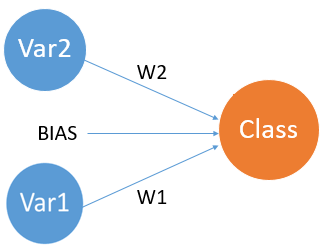

Var1 = 4
Var2 = 1.5
Bias = 12
W1 = 0.1
W2 = 0.5

We calculate the net activation. 
( Var1 x W1 ) + ( Var2 x W2 ) + Bias  = 13.15

We then calculate the activated output. 

Activation Function ( Net Activation ) 
Sigmoid ( 13.15 ) = 0.9999980545202348

So what does 0.99 mean? It gives us the probability of the DATA POINT existing IN THE CLASS.


### B- NEURAL NETWORK TRAINING

So what if the neural network predicted the wrong class? We would need to update the Bias and the Weights to shoot the right probability.

![Scratch.PNG](attachment:Scratch.PNG)

How that we have the incorrect probability:

0.9999980545202348

We will get the COST. The cost is a quantitative measure of HOW FAR we are from the ACTUAL value.


COST FUNCTION ( DATA , PREDICTION ) = COST 

COST FUNCTION = ( PREDICTION - DATA )^2 

So how do we minimize the cost function? 

We want the value of prediction that minimizes the cost function. 

Hence the function becomes: ( PREDICTION - 0 )^2




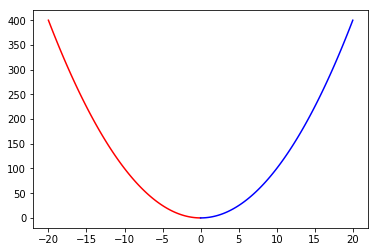

In [16]:
import numpy as np
import matplotlib.pyplot as plt
x1 = np.linspace(-20,0,100)
x2 = np.linspace(0,20,100)
plt.plot(x1, x1*x1, 'r')
plt.plot(x2, x2*x2, 'b')

As evident from the graph above, the cost function is basically a parabola with it's origin at the target/data value.

So when we are not at cost = 0 , how do we change the prediction? how do we know if we should add or subtract from the prediction? 

FROM THE SLOPE.

#### NEGATIVE SLOPE
- The red side of the graph shows a negative slope. We can see that the negative slope goes towards zero when the value of x is increased. 

- When we are below our target value, the slope is negative.

- When we want to increase the prediction, we have a negative slope.

#### POSITIVE SLOPE
- The blue side of the graph shows a positive slope. We can see that the positive slope goes towards zero when the value of x is decreased. 

- When we are above our target value, the slope is positibe.

- When we want to decrease the prediction, we have a positive slope.

So the slope gives us an idea of where to MOVE along the X AXIS for the function to be ZERO.


#### HOW DO WE GET THE SLOPE?

WE TAKE THE DERIVATIVE OF THE FUNCTION. ( KABOOOOOOOOOM )

This is the calculus portion of the Neural Networks. Derivatives are a quantitative measure of a function's slope.

#### HOW DO WE UPDATE THE PREDICTION?

We subtract a negative multiple of the slope from the prediction.

NEW PREDICTION =  PREDICTION - ( LEARNING RATE x SLOPE )

- CASE 1 : - VE SLOPE
    - PREDICTION - ( LR x - SLOPE ) 
    - PREDICTION + ( LR x SLOPE ) 

- CASE 2 : + VE SLOPE
    - PREDICTION - ( LR x SLOPE )

#### A DEEPER LOOK AT SLOPE

- SLOPE = RISE / RUN
- SLOPE = ( COST( PRED + LR ) - COST( PRED ) ) / LR

In [5]:
# Lets define our dataset
# data = variable1 , variable2 , class 
import numpy as np
import matplotlib.pyplot as plt
data = [[4,1.5,1],
          [3,1,0],
          [5,1.5,1],
          [4,1,0], 
          [4.5,0.5,1],
          [3,0.5,0],
          [6.5,1,1],
          [1,1,0]]
test = [4.5, 1] 

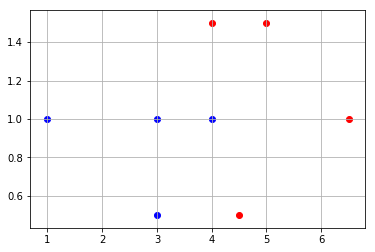

In [19]:
for i in range(len(data)):
    point = data[i]
    if point[2]==1:
        plt.scatter(point[0],point[1], c = 'r')
    else:
        plt.scatter(point[0],point[1], c = 'b') 
plt.grid()

In [20]:
import numpy as np
def sigmoid(x):
    return 1/(1+ np.exp(-x))
def sigmoid_h(x):
    return sigmoid(x) * (1-sigmoid(x))

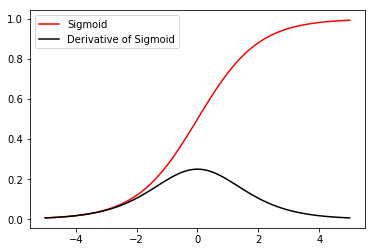

In [21]:
x = np.linspace(-5,5,100)
y = sigmoid(x)
y1 = sigmoid_h(x)
plt.plot(x,y, 'r', label="Sigmoid")
plt.plot(x,y1, 'k', label="Derivative of Sigmoid")
plt.legend()

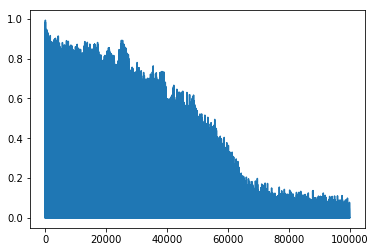

In [80]:
# TRAINING
costs = []
w1 = np.random.randn()
w2 = np.random.randn()
b = np.random.randn()
for i in range(100000):
    lr = 0.7
    index = np.random.randint(len(data))
    point = data[index]
    net = point[0] * w1 + point[1]* w2 + b
    # NET = ( X1 x W1 ) + ( X2 x W2 ) + B
    pred = sigmoid(net)
    # PRED = SIGMOID ( ( X1 x W1 ) + ( X2 x W2 ) + B )
    target = point[2]
    cost = np.square(pred - target)
    # COST = ( PRED - TARGET )^2
    # COST = ( SIGMOID ( ( X1 x W1 ) + ( X2 x W2 ) + B ) - TARGET )^2
    dcost_dpred = 2*(pred-target)
    # COST_wrt_PRED = 2 x ( PRED - TARGET) 
    dpred_dnet = sigmoid_h(net)
    # PRED_wrt_NET = derivative of sigmoid ( NET )
    dnet_dw1 = point[0]
    # NET_wrt_W1 = X1
    dnet_dw2 = point[1]
    # NET_wrt_W2 = X2
    dnet_db = 1
    # NET_wrt_B = 1
    
    #CHAIN RULE
    dcost_dw1 = dcost_dpred * dpred_dnet * dnet_dw1
    dcost_dw2 = dcost_dpred * dpred_dnet * dnet_dw2
    dcost_db = dcost_dpred * dpred_dnet * dnet_db
    
    #UPDATE
    w1 = w1 - lr* dcost_dw1
    w2 = w2 - lr* dcost_dw2
    b = b - lr* dcost_db
    
    costs.append(cost)
plt.plot(costs)


### WELCOME TO THE END OF THE TUTORIAL

Hope you enjoyed this tutorial just as much as I enjoyed coding it. This neural network was just a basic implementation of the concepts. 

For deployment, we have optimized deep learning libraries, for example tensorlow, pytorch, theano. 
We will dive right into them starting from the next tutorial. Until then, enjoy deep learning!


---------------------------------------------------------------------------------------
Copyrights © 2018, All Rights Reserved.
- Author: Mahnoor Anjum.
- Course: The Complete Hands-On Machine Learning Course
- Date Created: 2018-07-07
- Date Modified: -